# **Configuracion del ambiente**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import requests
import datetime
import time
import pytz
from bs4 import BeautifulSoup
from IPython.display import clear_output

**pandas:**

* **Función:** Manipulación de datos en formato tabular (DataFrames).
* **Utilización:** Importar, procesar y analizar datos financieros, como los precios de Bitcoin.

**matplotlib.pyplot:**

* **Función:** Visualización de datos, creación de gráficos y figuras.
* **Utilización:** Visualizar los datos de precios de Bitcoin y decisiones de compra/venta en gráficos.

**yfinance:**

* **Función:** Acceder a datos financieros de Yahoo Finance.
* **Utilización:** Obtener datos históricos de precios de Bitcoin en dólares estadounidenses.

**requests:**

* **Función:** Realizar solicitudes HTTP a páginas web.
* **Utilización:** Acceder y extraer datos de una página web, como CoinMarketCap, para obtener información en tiempo real.

**datetime:**

* **Función:** Trabajar con fechas y horas.
* **Utilización:**  Registrar la hora de verificación de datos y tomar decisiones basadas en la hora actual.

**time:**
* El módulo time se utiliza para realizar pausas en la ejecución del programa, lo que es útil en situaciones en las que se necesita esperar durante un período de tiempo específico

**pytz:**

* **Función:** Manejar zonas horarias.
* **Utilización:** Específicamente, se utiliza para definir la zona horaria de "America/Mexico_City" al registrar la hora.

**BeautifulSoup:**

* **Función:** Analizar y extraer datos de páginas web (web scraping).
* **Utilización:** Extraer información en tiempo real de la página web de CoinMarketCap para obtener el precio de Bitcoin y su tendencia.

**IPython.display:**

* **Función:** Proporciona funciones para controlar la salida en el entorno de IPython.
* **Utilización:** Utiliza clear_output para borrar la salida en la consola de Jupyter Notebook y mantenerla limpia y actualizada.

# **Obtencion de datos**

**Precio Historico**

In [ ]:
def importar_base_bitcoin(period='7d', interval='1m'):
    """
    Importa datos históricos de precios de Bitcoin desde Yahoo Finance.

    Args:
        period (str): Período de tiempo para los datos (por defecto, '7d' para 7 días).
        interval (str): Intervalo de tiempo para los datos (por defecto, '5m' para 5 minutos).

    Returns:
        pd.DataFrame: DataFrame de Pandas con los datos históricos de precios.
    """
    global df_bitcoin

    try:
        data = yf.Ticker("BTC-USD").history(period=period, interval=interval)
        df_bitcoin = pd.DataFrame(data)
        return df_bitcoin
    except Exception as e:
        print(f"Error al importar datos históricos: {e}")
        return None

# Ejemplo de uso
importar_base_bitcoin()


* **period (str):** Argumento opcional que especifica el período de tiempo para los datos históricos. Por defecto, se establece en '7d', lo que significa que se obtendrán datos de los últimos 7 días.

* **interval (str):** Argumento opcional que especifica el intervalo de tiempo para los datos históricos. Por defecto, se establece en '5m', lo que significa que los datos se obtendrán en intervalos de 5 minutos.

**La función realiza lo siguiente:**

1. Utiliza la biblioteca yfinance (que fue importada anteriormente como yf) para obtener datos históricos de precios de Bitcoin. La línea **data = yf.Ticker("BTC-USD").history(period=period, interval=interval)** solicita los datos correspondientes al período e intervalo especificados.

2. Luego, crea un DataFrame de Pandas con los datos obtenidos y lo asigna a la variable global **df_bitcoin**. Un DataFrame es una estructura de datos tabular muy utilizada en análisis de datos.

3. Si se ejecuta con éxito la obtención de datos, la función retorna el DataFrame **df_bitcoin** con los datos históricos de precios.

4. En caso de ocurrir una excepción, la función captura el error, imprime un mensaje de error y retorna **None**.

**Indicadores de tendencia**

In [ ]:
def extraer_tendencias():
    global precio_actual, tendencia
    try:
        url = 'https://coinmarketcap.com/'
        response = requests.get(url)
        response.raise_for_status()  # Verificar si hay errores en la solicitud HTTP
        soup = BeautifulSoup(response.text, 'lxml')

        # Extraer el precio de Bitcoin
        precio_btc = soup.find('div', class_='sc-a0353bbc-0 gDrtaY').get_text()
        precio_btc = precio_btc.replace(',', '').replace('$', '')
        precio_actual = float(precio_btc)

        # Determinar la tendencia
        icon = soup.findAll('span', {'class': ['sc-d55c02b-0 iwhBxy']})[0]
        if 'sc-d55c02b-0 iwhBxy' in ' '.join(icon['class']):
            tendencia = 'alta'
        else:
            tendencia = 'baja'

        # Extraer la variación
        variacion = soup.find('span', class_='sc-d55c02b-0 iwhBxy').get_text()

        datos_extraidos = {
            'Precio actual de Bitcoin': precio_actual,
            'Tendencia': tendencia,
            'Variación': variacion
        }
        return datos_extraidos

    except requests.exceptions.RequestException as e:
        print(f"Error en la solicitud HTTP: {e}")
    except Exception as ex:
        print(f"Error inesperado: {ex}")


resultados = extraer_tendencias()
if resultados:
    for clave, valor in resultados.items():
        print(f"{clave}: {valor}")

La función no recibe argumentos y retorna un diccionario con los siguientes datos:

* **'Precio actual de Bitcoin':** El precio actual de Bitcoin como un número en punto flotante (float).
* **'Tendencia':** La tendencia actual del precio de Bitcoin, que puede ser "alta" o "baja".
* **'Variación':** La variación en el precio de Bitcoin.

El proceso de la función es el siguiente:

1. Intenta realizar una solicitud HTTP al sitio web "coinmarketcap.com" utilizando la biblioteca **requests**.

2. Verifica si hay errores en la solicitud HTTP utilizando **response.raise_for_status().**

3. Utiliza **BeautifulSoup** (que fue importado previamente) para analizar el contenido HTML de la página web y extraer información relevante.

4. Extrae el precio de Bitcoin del sitio web, elimina caracteres como comas y signos de dólar del precio y convierte el valor en un número en punto flotante (**precio_actual**).

5. Determina la tendencia actual verificando las clases CSS de un elemento en la página web. Si encuentra la clase 'sc-d55c02b-0 iwhBxy', considera que la tendencia es "alta", de lo contrario, la considera "baja" (**tendencia**).

6. Extrae la variación en el precio de Bitcoin (**variacion**).

7. Crea un diccionario llamado **datos_extraidos** que contiene los datos extraídos y lo retorna.

8. En caso de errores, captura excepciones y muestra mensajes de error.

# **Limpieza de datos**

In [ ]:
def limpiar_datos():
    global df_bitcoin, media_bitcoin, df_bitcoin_limpio

    #Creando una copia
    df_bitcoin_limpio = df_bitcoin.copy()

    # Elimina índices duplicados y filas con valores nulos en 'Close'
    df_bitcoin_limpio = df_bitcoin.drop_duplicates().dropna(subset=['Close'])

    # Filtra filas con volumen mayor que cero
    df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio['Volume'] > 0]

    # Calcula los cuartiles
    close = df_bitcoin_limpio['Close']
    Q1 = close.quantile(0.25)
    Q3 = close.quantile(0.75)

    # Calcula el rango intercuartil
    IQR = Q3 - Q1

    # Define los límites para valores atípicos
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    #Calcular el precio promedio
    media_bitcoin = df_bitcoin_limpio['Close'].mean()

    # Filtra los valores atípicos
    df_bitcoin_limpio = df_bitcoin_limpio[(close >= lower_limit) & (close <= upper_limit)]

    return df_bitcoin_limpio

limpiar_datos()

La función realiza lo siguiente:

1. Crea una copia del DataFrame **df_bitcoin** y la asigna a la variable **df_bitcoin_limpio**. Esto se hace para evitar modificar el DataFrame original y trabajar con una versión limpia.

2. Elimina filas duplicadas y filas con valores nulos en la columna 'Close' del DataFrame **df_bitcoin_limpio**. Esto ayuda a eliminar datos incorrectos o faltantes.

3. Filtra las filas en las que el valor en la columna 'Volume' es mayor que cero. Esto elimina las filas que no tienen actividad de volumen.

4. Calcula los cuartiles del precio de cierre ('Close') en el DataFrame y el rango intercuartil (IQR). Esto es útil para identificar valores atípicos en los datos.

5. Define los límites para valores atípicos utilizando la regla del rango intercuartil (IQR). Los valores que estén por debajo de **lower_limit** o por encima de **upper_limit** se considerarán valores atípicos.

6. Calcula el precio promedio de Bitcoin y almacena este valor en la variable **media_bitcoin**.

7. Filtra el DataFrame **df_bitcoin_limpio** para mantener solo las filas cuyos valores en la columna 'Close' estén dentro de los límites definidos en el paso 5, eliminando así los valores atípicos.

8. Retorna el DataFrame **df_bitcoin_limpio** después de aplicar todas las transformaciones y filtrados.

**Comparacion**

In [ ]:
def mostrar_boxplots(df_bitcoin, df_bitcoin_limpio):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.boxplot(df_bitcoin['Close'], vert=True)
    plt.title('Boxplot de Precios de Bitcoin (No Limpio)')
    plt.xlabel('Precio de Bitcoin (No Limpio)')

    plt.subplot(1, 2, 2)
    plt.boxplot(df_bitcoin_limpio['Close'], vert=True)
    plt.title('Boxplot de Precios de Bitcoin (Limpio)')
    plt.xlabel('Precio de Bitcoin (Limpio)')

    plt.tight_layout()
    plt.show()

# Importar datos
df_bitcoin = importar_base_bitcoin()

# Limpiar datos
df_bitcoin_limpio = limpiar_datos()

# Mostrar boxplots
mostrar_boxplots(df_bitcoin, df_bitcoin_limpio)

La función **mostrar_boxplots** realiza lo siguiente:

1. Crea una figura con dos subplots (gráficos) en una sola fila y dos columnas utilizando **plt.figure(figsize=(12, 6))**. Esto crea una figura que contiene dos gráficos de caja uno al lado del otro.

2. En el primer subplot (izquierda), se crea un boxplot de los precios de Bitcoin contenidos en el DataFrame **df_bitcoin**. Esto representa los precios antes de aplicar la limpieza de datos. El título del gráfico se establece como 'Boxplot de Precios de Bitcoin (No Limpio)'.

3. En el segundo subplot (derecha), se crea un boxplot de los precios de Bitcoin contenidos en el DataFrame **df_bitcoin_limpio**. Esto representa los precios después de aplicar la limpieza de datos. El título del gráfico se establece como 'Boxplot de Precios de Bitcoin (Limpio)'.

4. Se ajusta el diseño de los gráficos para que no haya superposición utilizando **plt.tight_layout()**.

5. Finalmente, se muestra la figura que contiene los dos boxplots utilizando plt.show().

Después de definir la función, se realizan los siguientes pasos en el código principal:

1. Importar datos históricos de Bitcoin utilizando la función **importar_base_bitcoin()**. Esto llena el DataFrame **df_bitcoin** con los datos históricos de precios de Bitcoin.

2. Limpiar los datos utilizando la función **limpiar_datos()**. Esto crea un DataFrame limpio llamado **df_bitcoin_limpio**.

3- Llamar a la función **mostrar_boxplots(df_bitcoin, df_bitcoin_limpio)** para mostrar los boxplots de los precios de Bitcoin antes y después de la limpieza.

# **Toma de decisiones**

In [ ]:
def tomar_decisiones():
    global df_bitcoin, df_bitcoin_limpio, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
    if precio_actual >= media_bitcoin and tendencia == 'baja':
        algoritmo_decision = '-- Vender --'
    elif precio_actual < media_bitcoin and tendencia == 'alta':
        algoritmo_decision = '-- Comprar --'
    else:
        algoritmo_decision = '-- Esperar --'

    return algoritmo_decision

decision = tomar_decisiones()
print(f'Decisión: {decision}')


La función **tomar_decisiones** realiza lo siguiente:

1. Utiliza las variables globales **precio_actual**, **tendencia**, y **media_bitcoin**, que se han definido en otras partes del programa.

2. Evalúa una serie de condiciones utilizando estas variables para determinar la decisión que se debe tomar:

* Si el precio actual de Bitcoin es mayor o igual a la media de precios (**media_bitcoin**) y la tendencia es 'baja', la decisión es vender ('-- Vender --').
* Si el precio actual de Bitcoin es menor que la media de precios y la tendencia es 'alta', la decisión es comprar ('-- Comprar --').
* En cualquier otro caso, la decisión es esperar ('-- Esperar --').
3. Almacena la decisión tomada en la variable **algoritmo_decision**.

4. Retorna la decisión.

# **Visualizacion**

In [ ]:

def visualizacion():
    global df_bitcoin, df_bitcoin_limpio, precio_actual, tendencia, media_bitcoin,  algoritmo_decision
    df_bitcoin['Promedio'] = media_bitcoin

    plt.figure(figsize=(16, 5), facecolor='white')

    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

    plt.title('Decision', fontsize=18, fontweight='bold')
    df_bitcoin['Close'].plot(legend=None, color='blue')
    df_bitcoin['Promedio'].plot(legend=None, ls='--', color='green')

    plt.xlabel('Datos variación en los últimos 7 días', fontsize=18, fontweight='bold')

    plt.show()

df_bitcoin = importar_base_bitcoin()

visualizacion()



La función **visualizacion** realiza lo siguiente:

1. Utiliza las variables globales **df_bitcoin**, **precio_actual**, **tendencia**, **media_bitcoin** y **algoritmo_decision**, que se han definido en otras partes del programa.

2. Agrega una columna llamada 'Promedio' al DataFrame **df_bitcoin** y le asigna el valor de **media_bitcoin**. Esto crea una serie que representa la media de precios.

3. Configura el aspecto de la figura y el fondo del gráfico. La figura tiene un tamaño de 16x5 pulgadas y el fondo es blanco. Se utiliza el estilo 'seaborn-whitegrid'.

4. Configura el tamaño de las etiquetas en los ejes x e y con **plt.tick_params()**.

5. Establece el título del gráfico como 'Decision' con un tamaño de fuente y peso en negritas.

6. Plotea la serie de precios de Bitcoin (**df_bitcoin['Close']**) en color azul. También plotea la serie de la media de precios (**df_bitcoin['Promedio']**) en color verde. Se usa **ls='--'** para que la línea de la media sea punteada.

7. Agrega una etiqueta en el eje x para describir los datos y el período de tiempo.

8. Anota la decisión tomada (comprar, vender o esperar) en el gráfico en función de la variable **algoritmo_decision**. La anotación se coloca en el último punto de datos del precio de Bitcoin.

9. Muestra el gráfico con **plt.show()**.

Después de definir la función, se realiza lo siguiente en el código principal:

1. Importar datos históricos de Bitcoin utilizando la función **importar_base_bitcoin()**. Esto llena el DataFrame **df_bitcoin** con los datos históricos de precios de Bitcoin.

2. Llamar a la función **visualizacion()** para crear y mostrar la visualización de datos en un gráfico.

# **Automatizacion**

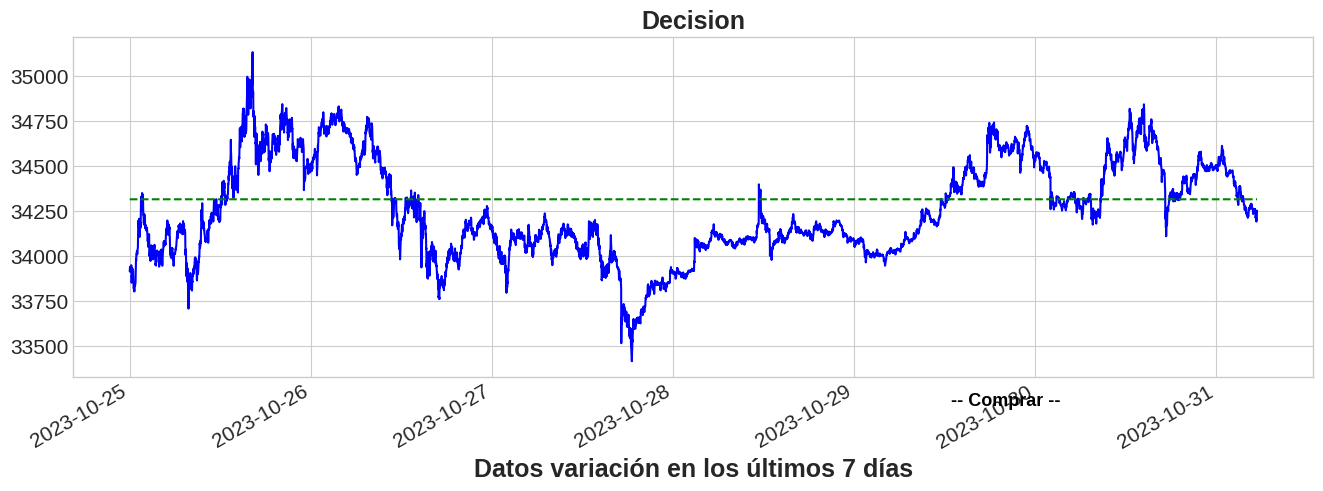

In [ ]:
def automatizado():
  contador = 0
  while True:
    contador += 1
    clear_output(wait=True)
    importar_base_bitcoin()
    extraer_tendencias()
    limpiar_datos()
    tomar_decisiones()
    tz = pytz.timezone('America/Mexico_City')
    now = datetime.datetime.now(tz)
    print("Hora de verificación:", now.strftime("%H:%M:%S"))
    print(f'Ejecuciones: {contador}')
    print('Decisión:', tomar_decisiones())
    print('Tendencia:',tendencia),print('Media:',int(media_bitcoin)),print('Precio:',int(precio_actual))
    visualizacion()
    time.sleep(300)
automatizado()

Por utlimo:

1. **contador**: Se inicializa una variable llamada contador en 0. Esta variable se utiliza para llevar un registro del número de ejecuciones del bucle.

2. **while True:** Esto crea un bucle infinito que se ejecutará continuamente. La idea es que el código dentro del bucle se ejecute de manera repetitiva.

3. **contador += 1:** En cada iteración del bucle, el contador se incrementa en 1.

4. **clear_output(wait=True):** Esta función, que generalmente se usa en entornos como Jupyter Notebook o IPython, se utiliza para limpiar la salida en la celda, lo que puede ser útil para mantener la interfaz ordenada y mostrar información actualizada.

5. **importar_base_bitcoin():** Se llama a esta función para importar datos históricos de precios de Bitcoin.

6. **extraer_tendencias():** Se llama a esta función para extraer tendencias o información relevante relacionada con Bitcoin.

7. **limpiar_datos():** Se llama a esta función para limpiar y preprocesar los datos.

8. **tomar_decisiones():** Se llama a esta función para tomar decisiones basadas en los datos.

9. **tz = pytz.timezone('America/Mexico_City'):** Se establece el huso horario en 'America/Mexico_City' utilizando el módulo pytz.

10. **now = datetime.datetime.now(tz):** Se obtiene la hora actual en el huso horario especificado.

11. Se imprime la hora de verificación, el número de ejecuciones del bucle, y la decisión tomada en función de los datos.

12. **visualizacion():** Se llama a esta función para crear y mostrar una visualización de datos de Bitcoin.

13. **time.sleep(300):** El programa espera durante 300 segundos (5 minutos) antes de la siguiente iteración del bucle.

# **Conclusion**

Este proyecto de automatización de análisis y toma de decisiones en el mercado de Bitcoin representa un valioso recurso para quienes buscan aprovechar las oportunidades en el mercado de criptomonedas. A través de la recopilación de datos confiables, el análisis de tendencias y la toma de decisiones basadas en criterios establecidos, el proyecto brinda a los usuarios una herramienta potente para gestionar sus inversiones en Bitcoin.

Sin embargo, es fundamental tener en cuenta que el éxito en los mercados financieros depende de múltiples factores, incluyendo la precisión de los datos, la solidez de la estrategia de inversión y la capacidad para adaptarse a un entorno en constante cambio. Además, cualquier proyecto relacionado con inversiones debe considerar cuidadosamente los riesgos involucrados y no sustituye el asesoramiento financiero profesional.

En última instancia, este proyecto es una herramienta valiosa para el monitoreo y la toma de decisiones, pero su eficacia y su aplicación exitosa requieren una comprensión sólida de los mercados financieros y una estrategia de inversión bien fundamentada.